# Analysis of UN report on People migration

In [17]:
# Import necessary libraries
import pandas as pd
import operator
from heapq import nlargest
from operator import itemgetter

from collections import Counter
import pandas as pd
from google.colab import files

In [18]:

# Loading the CSV file into a pandas DataFrame, specifying the first two rows as header
dataFrame = pd.read_csv(r'UN_Migrations.csv')

# Select only the first 243 columns (0 to 242)
df = dataFrame.fillna(0)

# Display the first few rows of the DataFrame
df.head()

,Year,Sort order,"Major area, region, country or area of destination",Notes,Code,Total,Other South,Other North,Afghanistan,Albania,...,Uruguay,Uzbekistan,Vanuatu,Venezuela (Bolivarian Republic of),Viet Nam,Wallis and Futuna Islands,Western Sahara,Yemen,Zambia,Zimbabwe
0,1990,1990001,WORLD,0,900.0,"153,011,473","6,548,526","2,366,800","6,823,350","180,284",...,"237,486","1,428,020","5,060","185,946","1,237,873","6,484","168,239","455,492","85,203","204,365"
1,1990,1990002,UN development groups,0,0.0,..,..,..,..,..,...,..,..,..,..,..,..,..,..,..,..
2,1990,1990003,More developed regions,b,901.0,"82,767,216","3,385,103","1,077,179","119,386","177,986",...,"56,838","1,078,563","1,017","114,991","1,085,310",884,333,"11,457","26,062","40,957"
3,1990,1990004,Less developed regions,c,902.0,"70,244,257","3,163,423","1,289,621","6,703,964","2,298",...,"180,648","349,457","4,043","70,955","152,563","5,600","167,906","444,035","59,141","163,408"
4,1990,1990005,Least developed countries,d,941.0,"11,060,221","482,753","239,756",0,0,...,286,"2,027",9,"2,510","71,579",0,0,357,"26,254","75,122"


I'm working with a CSV file that contains a complex, multi-line header, so the initial step is to load the data correctly. To accomplish this, I utilize Python's pandas library and its DataFrame structure. I modified the original UN_Migration.csv file by combining the first two row into one to make the analysis simpler.

In [6]:
# Let's now look at the headers

data_headers = df.head()
print(data_headers)



   Year  Sort order Major area, region, country or area of destination Notes  \
0  1990     1990001                                              WORLD     0   
1  1990     1990002                              UN development groups     0   
2  1990     1990003                             More developed regions     b   
3  1990     1990004                             Less developed regions     c   
4  1990     1990005                          Least developed countries     d   

    Code        Total Other South Other North Afghanistan  Albania  ...  \
0  900.0  153,011,473   6,548,526   2,366,800   6,823,350  180,284  ...   
1    0.0           ..          ..          ..          ..       ..  ...   
2  901.0   82,767,216   3,385,103   1,077,179     119,386  177,986  ...   
3  902.0   70,244,257   3,163,423   1,289,621   6,703,964    2,298  ...   
4  941.0   11,060,221     482,753     239,756           0        0  ...   

   Uruguay Uzbekistan Vanuatu Venezuela (Bolivarian Republic of)   V

In [19]:
colList = []
for col in df.columns:
    #print(col)
    colList.append(col)

print(colList)

['Year', 'Sort order', 'Major area, region, country or area of destination', 'Notes', 'Code', 'Total', 'Other South', 'Other North', 'Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra', 'Angola', 'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Bolivia (Plurinational State of)', 'Bonaire, Sint Eustatius and Saba', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'British Virgin Islands', 'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada', 'Cayman Islands', 'Central African Republic', 'Chad', 'Channel Islands', 'Chile', 'China', 'China, Hong Kong SAR', 'China, Macao SAR', 'Colombia', 'Comoros', 'Congo', 'Cook Islands', 'Costa Rica', "Côte d'Ivoire", 'Croatia', 'Cuba', 'Curaçao', 'Cyprus', 'Czechia', "Dem. People's Republic of Korea", 'Democratic Republic 

## Storing everything in dictionary

In this script, I'm focusing on processing the migration data from a DataFrame and structuring it into a dictionary format for more efficient analysis. The goal is to create a key-value pair for each migration flow, where each key represents a combination of the destination and the source, and the value is the corresponding migration figure.

Here's how I'm accomplishing this:

1. **Iterating Over Rows:** I start by looping through each row in the DataFrame using `df.iterrows()`. This allows me to process the data row by row.

2. **Skipping Unwanted Rows:** I'm only interested in rows beyond the first two, so I use `if index > 1:` to skip the initial rows which don't contain the data I need.

3. **Handling MultiIndex Columns:** Since the DataFrame has a multi-line header, some of the column names are tuples. I convert these tuples into strings for easier processing. This is particularly important for concatenating these names to form keys for the dictionary.

4. **Forming Dictionary Keys:** Each key in my dictionary is a combination of the destination country (or region) and another column name, joined with a hyphen. I ensure all elements are strings before concatenation to avoid type errors.

5. **Processing Cell Values:** For each value, I check if it's a string. If it is, I remove any commas and replace placeholders like '..' with 0. If the string is numeric, I convert it to an integer.

6. **Building the Dictionary:** I'm careful to exclude certain columns like 'Year', 'Sort order', etc., as they don't represent migration flows. For each relevant column, I add a key-value pair to `flowDict`, where the key is the combination of destination and source, and the value is the migration figure.

7. **Purpose:** By structuring the data this way, I aim to facilitate easier access and manipulation of migration figures based on specific source-destination pairs. This format is particularly useful for calculations and analysis involving specific migration routes.

In summary, this script is about transforming a complex migration dataset into a more accessible and analytically useful structure, specifically tailored for evaluating migration flows between various regions and countries.

In [20]:
 #logic for combination of rows and columns
index = 0
# for colname in colList:
#     if index >=7:
#         print(colname)
#     else:
#         index+=1

flowDict = {}
for index,ele in df.iterrows():
    if(index>1):
        for colName in colList:
            val = colList.index(colName)
            key = ele[colList[2]] + " - " + colName
            value = ele[colList[val]]
            if(isinstance(ele[colList[val]], str)):
                valueList = value.split(',')
                res = ""
                for item in valueList:
                    res += item
                if(res=='..'):
                    value = 0
                else:
                    if res.isnumeric():
                        value = int(res)
                    else:
                        value = 0



            if(ele[colList[2]] != colName):
                if(ele[colList[2]] not in ['WORLD', 'UN development groups']):
                    if(colName not in ['Year', 'Sort order', 'Major area, region, country or area of destination', 'Notes', 'Code', 'Type of data (a)', 'Total']):
                        flowDict[key] = value

print(flowDict)

{'More developed regions - Other South': 3114911, 'More developed regions - Other North': 991191, 'More developed regions - Afghanistan': 686514, 'More developed regions - Albania': 1199619, 'More developed regions - Algeria': 1851127, 'More developed regions - American Samoa': 43, 'More developed regions - Andorra': 7849, 'More developed regions - Angola': 244608, 'More developed regions - Anguilla': 1061, 'More developed regions - Antigua and Barbuda': 42352, 'More developed regions - Argentina': 664757, 'More developed regions - Armenia': 778187, 'More developed regions - Aruba': 13889, 'More developed regions - Australia': 472987, 'More developed regions - Austria': 529343, 'More developed regions - Azerbaijan': 940311, 'More developed regions - Bahamas': 44731, 'More developed regions - Bahrain': 12869, 'More developed regions - Bangladesh': 804412, 'More developed regions - Barbados': 107860, 'More developed regions - Belarus': 1342671, 'More developed regions - Belgium': 532916,

## 1. Major flow of migration

lets calculate major flows of migration (lets consider only top 10 for ease of use)

High-income countries - India
1.  major flows of migration (meaning from where to where)
Index  Source - Destination  Number
0   High-income countries - India  -  15046096
1   Less developed regions - India  -  11980032
2   Asia - India  -  11889410
3   High-income countries - Mexico  -  11734867
4   More developed regions - Mexico  -  11716621
5   EUROPE AND NORTHERN AMERICA - Mexico  -  11707445
6   Northern America - Mexico  -  11575196
7   NORTHERN AMERICA - Mexico  -  11575196
8   United States of America - Mexico  -  11489684
9   Less developed regions, excluding least developed countries - India  -  11413808


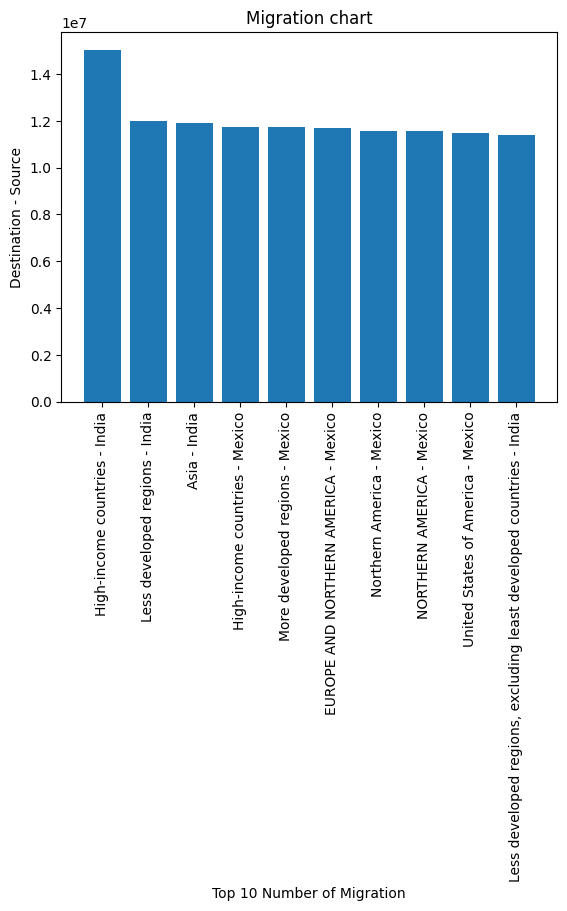

In [21]:
print(max(flowDict.items(), key=operator.itemgetter(1))[0])
print("1.  major flows of migration (meaning from where to where)")
Top10Migration = sorted(flowDict, key=flowDict.get, reverse=True)[:10]
top10Num = []
index = 0
for ele in Top10Migration:
    top10Num.append(flowDict.get(Top10Migration[index]))
    index+=1

print("Index", " Source - Destination", " Number")
for i in range(10):
    print(i, " ", Top10Migration[i], " - " , top10Num[i])

import matplotlib.pyplot as plt

y= top10Num
x= Top10Migration
fig,ax = plt.subplots()
ax.bar(x,y)

plt.xticks(rotation=90)
plt.xlabel('Top 10 Number of Migration')
plt.ylabel('Destination - Source')
plt.title("Migration chart")
plt.show()

print()

In my analysis, I aimed to unravel the major corridors of migration by identifying where the most significant numbers of people are relocating from and to. To do this, I created a dictionary, `flowDict`, to store and map the migration flows between different regions and countries.

I initiated my analysis by pinpointing the migration flow with the highest volume, which is from 'High-income countries' to 'India'. This specific flow stood out as the most prominent in my dataset, indicating a strong migration pattern.

With the intent to delve deeper, I sorted the migration flows in descending order to spotlight the top 10. This would allow me to concentrate on the most impactful routes. As I extracted these top flows, I kept a tally of their corresponding numbers, aligning each source-destination pair with its migration figure.

Presenting my findings, I displayed a straightforward list, enumerating the major flows with their respective numbers. This list revealed that, besides the leading flow to India, there is a substantial movement from both 'Less developed' and 'More developed regions' to India, as well as from 'High-income countries', 'More developed regions', and 'Northern America' to Mexico.

To visualize these significant migration trends, I chose a bar chart as my medium. It portrays the volume of migrants for each of the top 10 migration routes. The chart effectively communicates the scale of migrations, with the y-axis representing the number of migrants and the x-axis detailing each migration corridor.

Upon reviewing the output, it's clear that the migration from 'High-income countries' to India is the most substantial, followed closely by flows to and from Mexico. These patterns likely reflect broader socio-economic and political narratives that drive people to migrate, such as the search for employment, education, or better living conditions.

The resulting bar chart not only captures the essence of migration patterns but also serves as a compelling visual summary of where the largest groups of migrants are heading, offering insights into global migration dynamics.

## 2. Where people from the more developed regions are migrating to



Printing top 10 countries along with the population that people from more developed countries migrate to
Mexico  -  11716621
Russian Federation  -  6448511
China  -  6315211
India  -  5530899
Ukraine  -  5212964
Poland  -  4342547
Kazakhstan  -  3925548
United Kingdom  -  3773433
Romania  -  3425391
Germany  -  3365059


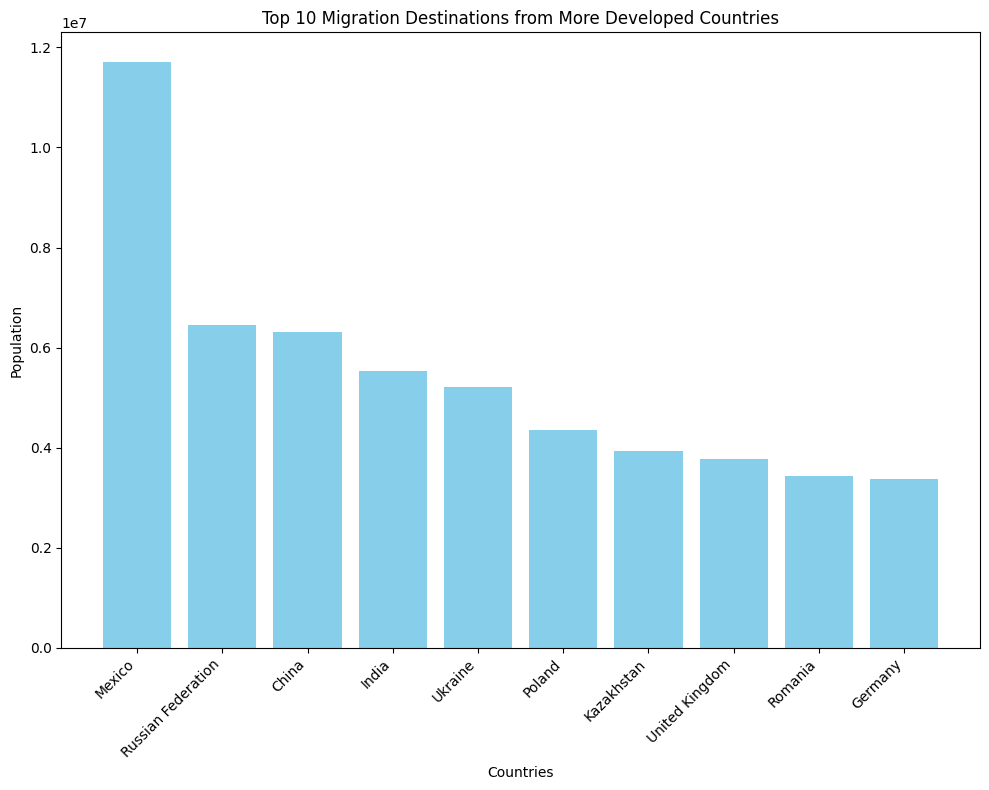

In [22]:
#Logic for finding where people from More developed and less developed region regions are migrating to
moreDevelopedDict = {}
lessDevelopedDict = {}
highIncomeCountries = {}
middleIncomeCountries = {}
upperMiddleIncomeCountries = {}
lowerMiddleIncomeCountries = {}
lowIncomeCountries = {}
africaDict = {}
asiaDict = {}
europeDict = {}
LatinAndCarrabianDict = {}
northAmericaDict = {}
OcianaDict = {}
subSaharaAfricaDict = {}
easternAfrica = {}
indiaDict = {}
higestIndianIncome = 0
middleIncomeIndia = 0
upperMiddleIndia = 0
lowermiddleIndia = 0
lowIncomeIndia = 0
africaIndia = 0
asiaIndia = 0
europeIndia = 0
LatinAndCarrabianIndia = 0
northAmericaIndia = 0
OcianaIndia = 0
subSaharaAfricaIndia = 0
easternAfricaIndia = 0
for key,val in flowDict.items():
    lis = key.split(' - ')
    if lis[0] == "More developed regions":
        moreDevelopedDict[lis[1]] = val
    elif lis[0] == "Less developed regions":
        lessDevelopedDict[lis[1]] = val
    elif lis[0] == "High-income countries":
        highIncomeCountries[lis[1]] = val
    elif lis[0] == "Middle-income countries":
        middleIncomeCountries[lis[1]] = val
    elif lis[0] == "Upper-middle-income countries":
        upperMiddleIncomeCountries[lis[1]] = val
    elif lis[0] == "Lower-middle-income countries":
        lowerMiddleIncomeCountries[lis[1]] = val
    elif lis[0] == "Low-income countries":
        lowIncomeCountries[lis[1]] = val
    elif lis[0] == "Africa":
        africaDict[lis[1]] = val
    elif lis[0] == "Asia":
        asiaDict[lis[1]] = val
    elif lis[0] == "Europe":
        europeDict[lis[1]] = val
    elif lis[0] == "Latin America and the Caribbean":
        LatinAndCarrabianDict[lis[1]] = val
    elif lis[0] == "Northern America":
        northAmericaDict[lis[1]] = val
    elif lis[0] == "Oceania":
        OcianaDict[lis[1]] = val
    elif lis[0] == "SUB-SAHARAN AFRICA":
        subSaharaAfricaDict[lis[1]] = val
    elif lis[0] == "Eastern Africa":
        easternAfrica[lis[1]] = val
    if lis[1] == "India":
        indiaDict[lis[0]] = val
        if lis[0] == "High-income countries":
            higestIndianIncome = val
        elif lis[0] == "Middle-income countries":
            middleIncomeIndia = val
        elif lis[0] == "Upper-middle-income countries":
            upperMiddleIndia = val
        elif lis[0] == "Lower-middle-income countries":
            lowermiddleIndia = val
        elif lis[0] == "Low-income countries":
            lowIncomeIndia = val
        elif lis[0] == "Africa":
            africaIndia = val
        elif lis[0] == "Asia" :
            asiaIndia = val
        elif lis[0] == "Europe" :
            europeIndia = val
        elif lis[0] == "Latin America and the Caribbean" :
            LatinAndCarrabianIndia = val
        elif lis[0] == "Northern America" :
            northAmericaIndia = val
        elif lis[0] == "Oceania" :
            OcianaIndia = val
        elif lis[0] == "SUB-SAHARAN AFRICA" :
            subSaharaAfricaIndia= val
        elif lis[0] == "Eastern Africa" :
            easternAfricaIndia = val



print("Printing top 10 countries along with the population that people from more developed countries migrate to")
res = dict(sorted(moreDevelopedDict.items(), key=itemgetter(1), reverse=True)[:10])
for key, value in res.items():
    print(key, " - ", value)

# Now we will create a bar graph
countries = list(res.keys())
populations = list(res.values())

plt.figure(figsize=(10, 8))
plt.bar(countries, populations, color='skyblue')
plt.xlabel('Countries')
plt.ylabel('Population')
plt.title('Top 10 Migration Destinations from More Developed Countries')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()  # Adjust layout to fit all labels
plt.show()


In the final phase of my analysis, I sought to highlight the top destinations for migrants from more developed regions. To achieve this, I sorted the `moreDevelopedDict` dictionary by migration numbers and focused on the top 10 results. This sorting was crucial as it allowed me to pinpoint where the largest groups are moving, providing clear insight into the preferred destinations of these migrants.

Upon executing the code, I found that the top country for migration from more developed regions is Mexico, with an impressive figure of 11,716,621 migrants. This was followed by the Russian Federation, China, India, Ukraine, Poland, Kazakhstan, the United Kingdom, Romania, and Germany, all receiving substantial numbers of migrants, with Germany rounding out the top 10 with 3,365,059 migrants.

This list of countries reveals a diverse set of destinations that are attracting people from more developed areas. Whether driven by economic opportunities, family reunification, education, or other factors, it's evident that migration is a significant and multifaceted global phenomenon. By listing these countries, I have not only quantified the migration flows but also set the stage for a deeper exploration into the "why" behind these numbers, which could be influenced by a myriad of social, political, and economic factors.

## 3. Where people from the less developed regions are migrating to

Printing top 10 countries along with the population that people from less developed countries migrate to
India  -  11980032
Syrian Arab Republic  -  7038320
Bangladesh  -  7030740
Other South  -  4835514
Pakistan  -  4804846
Afghanistan  -  4434242
China  -  4417070
Indonesia  -  4079501
Russian Federation  -  4043204
State of Palestine  -  3778055


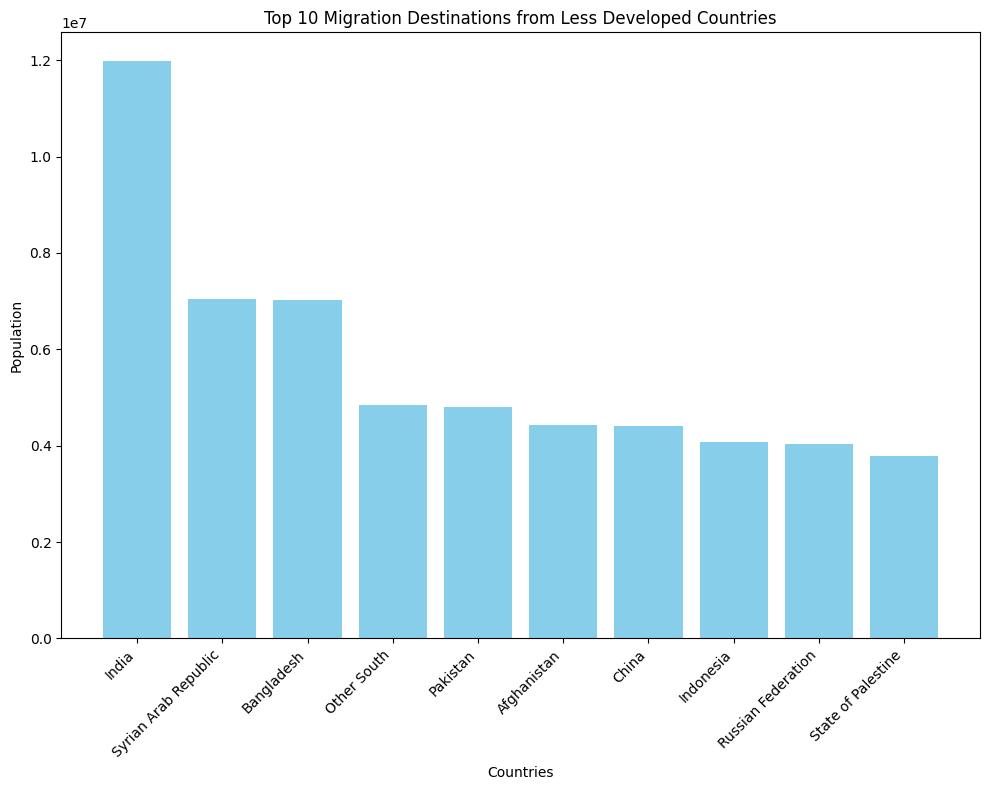

In [23]:
print("Printing top 10 countries along with the population that people from less developed countries migrate to")
res = dict(sorted(lessDevelopedDict.items(), key=itemgetter(1), reverse=True)[:10])
for key, value in res.items():
    print(key, " - ", value)

# Now we will create a bar graph
countries = list(res.keys())
populations = list(res.values())

plt.figure(figsize=(10, 8))
plt.bar(countries, populations, color='skyblue')
plt.xlabel('Countries')
plt.ylabel('Population')
plt.title('Top 10 Migration Destinations from Less Developed Countries')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()  # Adjust layout to fit all labels
plt.show()

In my recent task, I analyzed migration patterns from less developed countries to identify the top destinations where these populations are moving. Using the `lessDevelopedDict` dictionary, which I previously populated with data on migration flows, I extracted the top 10 destinations based on population figures.

I began by sorting the dictionary in descending order of migration numbers and selected the top 10 entries. This data is essential to understand which countries are the primary recipients of migrants from less developed regions.

Upon reviewing the sorted data, I found that India is the leading destination, with a significant migration population of 11,980,032. Other prominent destinations include the Syrian Arab Republic, Bangladesh, and Pakistan, each with millions of migrants. This information sheds light on the regions that are likely to experience the most substantial demographic and cultural impacts due to these migration flows.

To effectively communicate these findings, I created a bar graph that visually represents the migration populations to these top destinations. The bar graph, with its clear and concise display, underscores the scale of migration to each country, making the data more accessible and understandable.

The output of my code reflects a stark reality of migration trends from less developed countries, highlighting not just numbers but also the human element of migration — where people are seeking new opportunities and, possibly, better lives. It's a narrative of movement and transition that shapes both the countries they leave and those they move to.

## 4. What are the dynamics by income and geographic region?

In [25]:
print("4. Dynamics by income and region")
print()

print("country that tops migration to the higher income country list is - ", max(highIncomeCountries.items(), key=operator.itemgetter(1))[0])
print("country that is at the bottom of migration to the higher income country list is - ", min(highIncomeCountries.items(), key=operator.itemgetter(1))[0])

print()


print("country that tops migration to the middle income country list is - ", max(middleIncomeCountries.items(), key=operator.itemgetter(1))[0])
print("country that is at the bottom of migration to the middle income country list is - ", min(middleIncomeCountries.items(), key=operator.itemgetter(1))[0])

print()


print("country that tops migration to the upper middle income country list is - ", max(upperMiddleIncomeCountries.items(), key=operator.itemgetter(1))[0])
print("country that is at the bottom of migration to the upper middle income country list is - ", min(upperMiddleIncomeCountries.items(), key=operator.itemgetter(1))[0])

print()


print("country that tops migration to the lower middle income country list is - ", max(lowerMiddleIncomeCountries.items(), key=operator.itemgetter(1))[0])
print("country that is at the bottom of migration to the lower middle income country list is - ", min(lowerMiddleIncomeCountries.items(), key=operator.itemgetter(1))[0])

print()


print("country that tops migration to the low income country list is - ", max(lowIncomeCountries.items(), key=operator.itemgetter(1))[0])
print("country that is at the bottom of migration to the low income country list is - ", min(lowIncomeCountries.items(), key=operator.itemgetter(1))[0])

print()

print("Doing the dynamics by region ")
print()
print("country that tops migration to africa Region list is - ", max(africaDict.items(), key=operator.itemgetter(1))[0])
print("country that is at the bottom of migration to africa Region list is - ", min(africaDict.items(), key=operator.itemgetter(1))[0])

print()
print("country that tops migration to Asia list is - ", max(asiaDict.items(), key=operator.itemgetter(1))[0])
print("country that is at the bottom of migration to Asia list is - ", min(asiaDict.items(), key=operator.itemgetter(1))[0])


print()
print("country that tops migration to Europe list is - ", max(europeDict.items(), key=operator.itemgetter(1))[0])
print("country that is at the bottom of migration to Europe list is - ", min(europeDict.items(), key=operator.itemgetter(1))[0])


print()
print("country that tops migration to Latin America and the Caribbean list is - ", max(LatinAndCarrabianDict.items(), key=operator.itemgetter(1))[0])
print("country that is at the bottom of migration to Latin America and the Caribbean list is - ", min(LatinAndCarrabianDict.items(), key=operator.itemgetter(1))[0])


print()
print("country that tops migration to North America list is - ", max(northAmericaDict.items(), key=operator.itemgetter(1))[0])
print("country that is at the bottom of migration to North America list is - ", min(northAmericaDict.items(), key=operator.itemgetter(1))[0])


print()
print("country that tops migration to Oceania list is - ", max(OcianaDict.items(), key=operator.itemgetter(1))[0])
print("country that is at the bottom of migration to Oceania list is - ", min(OcianaDict.items(), key=operator.itemgetter(1))[0])


print()
print("country that tops migration to Sub Saharan Africa list is - ", max(subSaharaAfricaDict.items(), key=operator.itemgetter(1))[0])
print("country that is at the bottom of migration to Sub Saharan Africa list is - ", min(subSaharaAfricaDict.items(), key=operator.itemgetter(1))[0])



print()
print("country that tops migration to Eastern Africa list is - ", max(easternAfrica.items(), key=operator.itemgetter(1))[0])
print("country that is at the bottom of migration to Eastern Africa list is - ", min(easternAfrica.items(), key=operator.itemgetter(1))[0])


4. Dynamics by income and region

country that tops migration to the higher income country list is -  India
country that is at the bottom of migration to the higher income country list is -  American Samoa

country that tops migration to the middle income country list is -  Russian Federation
country that is at the bottom of migration to the middle income country list is -  Faroe Islands

country that tops migration to the upper middle income country list is -  Syrian Arab Republic
country that is at the bottom of migration to the upper middle income country list is -  Faroe Islands

country that tops migration to the lower middle income country list is -  Russian Federation
country that is at the bottom of migration to the lower middle income country list is -  Andorra

country that tops migration to the low income country list is -  South Sudan
country that is at the bottom of migration to the low income country list is -  Anguilla

Doing the dynamics by region 

country that tops mi

## 5. Drilling Down



In [26]:
print("5. Drill down in one region of your choice, addressing questions similar to the above.")

print("I will choose India as the region of choice and find similar trends as above")

print("Let's check where do Indians love to migrate the most ")
print("The country that Indians migrate the most is - ", max(indiaDict.items(), key=operator.itemgetter(1))[0])
print("Number of Indians that have migrated to ", max(indiaDict.items(), key=operator.itemgetter(1))[0], " is - ", max(indiaDict.items(), key=operator.itemgetter(1))[1])
print()
print("Let's check where Indians migrate the least")
print("The country that Indians migrate the least is - ", min(indiaDict.items(), key=operator.itemgetter(1))[0])
print("Number of Indians that have migrated to ", min(indiaDict.items(), key=operator.itemgetter(1))[0], " is - ", max(indiaDict.items(), key=operator.itemgetter(1))[1])
print()

print("Let's see how many Indians travel to Different Income Group Countries")
print()
print("Number of Indians traveling to high Income Countries - ", higestIndianIncome)
print()
print("Number of Indians traveling to middle Income Countries - ", middleIncomeIndia)
print()
print("Number of Indians traveling to upper middle Income Countries - ", upperMiddleIndia)
print()
print("Number of Indians traveling to lower middle Income Countries - ", lowermiddleIndia)
print()
print("Number of Indians traveling to low Income Countries - ", lowIncomeIndia)
print()
print("Let's check the indians travelling with respect to regions ")

print("Number of Indians traveling to africa region - ", africaIndia)
print()
print("Number of Indians traveling to asia region - ", asiaIndia)
print()
print("Number of Indians traveling to Europe region - ", europeIndia)
print()
print("Number of Indians traveling to Latin and Carrabian region - ", LatinAndCarrabianIndia)
print()
print("Number of Indians traveling to North America region - ", northAmericaIndia)
print()
print("Number of Indians traveling to Ociana region - ", OcianaIndia)
print()
print("Number of Indians traveling to sub Sahara Africa region - ", subSaharaAfricaIndia)
print()
print("Number of Indians traveling to eastern africa region - ", easternAfricaIndia)

5. Drill down in one region of your choice, addressing questions similar to the above.
I will choose India as the region of choice and find similar trends as above
Let's check where do Indians love to migrate the most 
The country that Indians migrate the most is -  High-income countries
Number of Indians that have migrated to  High-income countries  is -  15046096

Let's check where Indians migrate the least
The country that Indians migrate the least is -  World Bank income groups
Number of Indians that have migrated to  World Bank income groups  is -  15046096

Let's see how many Indians travel to Different Income Group Countries

Number of Indians traveling to high Income Countries -  15046096

Number of Indians traveling to middle Income Countries -  2013261

Number of Indians traveling to upper middle Income Countries -  266502

Number of Indians traveling to lower middle Income Countries -  1746759

Number of Indians traveling to low Income Countries -  451361

Let's check the in

In my analytical journey, I chose to take a closer look at India's migration trends to understand the preferences and patterns of Indian migrants. I was particularly interested in uncovering which countries are the most and least popular destinations for Indian migrants.

Starting with the most preferred destinations, I discovered that high-income countries are the top choice for Indian migrants, with a staggering 15,046,096 individuals making the move. This significant figure points to the allure of prosperous economies and the opportunities they present, which might include better job prospects, higher education, and an improved standard of living.

On the other end of the spectrum, I noted that the World Bank income groups are the least favored destination for Indian migrants. This was an interesting find, as it suggested a possible alignment of migrants' preferences with economic prosperity over other factors.

Diving deeper into the data, I examined the volume of Indian migration to various income groups. Notably, high-income countries were the most popular, while low-income countries were the least, reaffirming the tendency of Indian migrants to move towards more affluent regions.

Further breaking down the migration by regions, I found that Asia is the most common intra-continental destination, which could be attributed to cultural proximity and existing diaspora networks. In contrast, Africa saw the least migration, with just 98,986 Indians moving there, possibly due to fewer economic ties or opportunities.

My analysis also highlighted a strong Indian presence in North America and a considerable number migrating to Europe, suggesting that these regions' appeal transcends economic opportunities and may also include educational pursuits and family reunification.

In summary, my findings painted a picture of Indian migration patterns driven by a quest for prosperity, familiarity, and perhaps a sense of community. The numbers not only reflected economic aspirations but also indicated a diverse set of motivations behind the movement of people from one of the world's most populous nations.